# **Read, Arange, and Plot LI6800 File**
In this script you will find basic functions for:
reading, arranging,saving, and cleaning files that come as output from the LI6800 system. In addition, you can run basic functions to display distributions of parameters and linear relationships between parameters in the file.\

**By**: Yehuda Yungstein

**Contact**: yehuayu@gmail.com

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
sns.set_theme(style="white",font_scale = 1.5)
# Set the font to Times new roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

### Read, Arange and Save:
**Important note:** The first function that sorts the file is correct for the specific version of the LI6800 system I'm working with. Note that this can change. This will mainly affect lines 6-7 in the first function. You will have to put other numbers depending on the first line where the data is in the file.

In [59]:
def Read_file(path_to_file,path_to_save,Save = True):
  # Read the file:
  df = pd.read_excel(path_to_file)
  
  # Create dict of parameters and units:
  vars = df.loc[13].values # row of parameters (such as "E", "gsw" etc.)
  units = df.loc[14].values # row of units:
  units_dict = dict(zip(vars, units))

  # Delete non-relevant rows:
  df = df.iloc[15:]
  # set the columns names by paramters:
  df.columns = vars
  # reset the index column:
  df = df.reset_index(drop=True)
  # Change all posible columns type to float:
  df = df.apply(pd.to_numeric, errors='ignore')

  # save th clean file:
  if Save == True:
    df.to_excel(path_to_save)
    
  return df,units_dict

### Plot 1 Parameter distribution

In [24]:
def plot_parameter_distribution(df,parameter):
  fig, ax = plt.subplots(1, figsize=(8,6))
  ax = sns.histplot(data=df, x=parameter, color ="black",alpha =.6 ) # histplot distribution
  ax.set_xlabel(f'{parameter,units_dict[parameter]}') # X label based on the dictionary we created
  ax.set_title(f'{parameter} Distribution')
  return

### Scatterplot and linear correlation between 2 parameters

In [74]:
def plot_2parameters(df,col1,col2):
  fig, ax = plt.subplots(1, figsize=(8,6))
  x = df[col1]
  y = df[col2]
  mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
  slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
  r2 =  round(r_value**2,2)
  # scatter
  ax = sns.scatterplot(data=df,x=x[mask], y=y[mask],color = 'magenta',edgecolors='black')
  # Regression line:
  ax = sns.lineplot(x=x[mask], y=x[mask]*slope+intercept,
                    color = "black",lw = 2,
                    label = f"$R^2$ = {r2} \n p = {round(p_value,2)} ")
  ax.set_xlabel(col1,fontsize=15)
  ax.set_ylabel(col2,fontsize=15)
  ax.set_title(str(col2) + " Vs " + str(col1),fontsize=20)
  plt.legend(fontsize=14)
  return

### Example:

In [60]:
path = "path_to_raw_file.xlsx"
path_to_save = 'path_to_save_clean_file.xlsx'
df, units_dict = Read_file(path)
df

,obs,time,elapsed,date,hhmmss,averaging,pot,wuei_dyn,wuei_steady,vci,...,Ts,Tr,CO2_%,Desiccant_%,Humidifier_%,Txchg_sp,CO2_r_sp,H2O_r_sp,SS_s,SS_r
0,1,1.664437e+09,0.0,20220929 10:41:24,10:41:24,3,1,5.232504,5.635719,0.727888,...,29.5246,29.3722,26.2088,42.0922,78.1079,22.9096,410,18.3279,101.005,87.9250
1,2,1.664438e+09,371.6,20220929 10:47:36,10:47:36,3,2,5.729503,5.528761,0.727028,...,29.6714,29.5692,26.4416,41.7755,58.5129,23.0626,410,17.7652,100.995,87.9398
2,3,1.664438e+09,783.1,20220929 10:54:27,10:54:27,3,3,7.874011,7.996470,0.581462,...,29.8529,29.7578,26.4942,37.0963,40.5083,22.7255,410,18.3340,100.971,87.9414
3,4,1.664439e+09,1400.6,20220929 11:04:45,11:04:45,3,4,4.405910,4.434664,0.760052,...,29.9053,29.8268,26.5133,42.1044,10.0743,22.9989,410,16.3533,100.966,87.9840
4,5,1.664439e+09,1760.1,20220929 11:10:44,11:10:44,3,5,11.240264,11.491513,0.416250,...,29.7512,29.6875,26.5767,32.3216,0.0000,23.0433,410,18.5959,100.990,87.9954
5,6,1.664439e+09,2005.0,20220929 11:14:49,11:14:49,3,6,11.188262,13.585627,0.413849,...,29.7556,29.6824,26.6126,31.9347,0.0000,22.6801,410,18.7024,100.992,87.9898
6,7,1.664440e+09,2305.0,20220929 11:19:49,11:19:49,3,7,5.383882,5.427297,0.716276,...,29.8093,29.7281,26.6177,38.9479,0.0000,23.1890,410,16.9898,100.988,87.9982
7,8,1.664440e+09,2505.0,20220929 11:23:09,11:23:09,3,8,3.159820,3.153880,0.826058,...,29.8555,29.7705,26.5777,49.2918,0.0000,22.8243,410,14.2891,100.982,88.0183
8,9,1.664440e+09,2887.0,20220929 11:29:31,11:29:31,3,9,6.285646,6.419745,0.660821,...,29.9842,29.8966,26.6362,43.3026,0.0000,22.9109,410,16.2681,100.949,88.0099
9,10,1.664440e+09,3211.5,20220929 11:34:56,11:34:56,3,10,14.177482,14.075466,0.268942,...,30.1058,30.0173,26.6891,34.8277,0.0000,22.7659,410,18.7101,100.935,87.9846


In [55]:
units_dict

{'obs': nan,
 'time': 'secs',
 'elapsed': 's',
 'date': nan,
 'hhmmss': nan,
 'averaging': 's',
 'pot': nan,
 'wuei_dyn': nan,
 'wuei_steady': nan,
 'vci': nan,
 'TIME': 's',
 'E': 'mol m⁻² s⁻¹',
 'Emm': 'mmol m⁻² s⁻¹',
 'A': 'µmol m⁻² s⁻¹',
 'Ca': 'µmol mol⁻¹',
 'Ci': 'µmol mol⁻¹',
 'Pci': 'Pa',
 'Pca': 'Pa',
 'gsw': 'mol m⁻² s⁻¹',
 'gbw': 'mol m⁻² s⁻¹',
 'gtw': 'mol m⁻² s⁻¹',
 'gtc': 'mol m⁻² s⁻¹',
 'Rabs': 'W m⁻²',
 'TleafEB': '°C',
 'TleafCnd': '°C',
 'SVPleaf': 'kPa',
 'RHcham': '%',
 'VPcham': 'kPa',
 'SVPcham': 'kPa',
 'VPDleaf': 'kPa',
 'LatHFlux': 'W m⁻²',
 'SenHFlux': 'W m⁻²',
 'NetTherm': 'W m⁻²',
 'EBSum': 'W m⁻²',
 'Asty': 'µmol m⁻² s⁻¹',
 'Esty': 'mmol m⁻² s⁻¹',
 'Adyn': 'µmol m⁻² s⁻¹',
 'Crd': 'µmol mol⁻¹',
 'Csd': 'µmol mol⁻¹',
 'dCsd/dt': 'µmol mol⁻¹ s⁻¹',
 'αVc': 'cm³',
 'Edyn': 'mmol m⁻² s⁻¹',
 'Hr': 'mmol mol⁻¹',
 'Hs': 'mmol mol⁻¹',
 'dHs/dt': 'mmol mol⁻¹ s⁻¹',
 'αVh': 'cm³',
 'Leak': 'µmol s⁻¹',
 'LeakPct': '%',
 'CorrFact': nan,
 'CorrFactPct': '%',
 'Fan': 'µmol

In [56]:
df.head()

,obs,time,elapsed,date,hhmmss,averaging,pot,wuei_dyn,wuei_steady,vci,...,Ts,Tr,CO2_%,Desiccant_%,Humidifier_%,Txchg_sp,CO2_r_sp,H2O_r_sp,SS_s,SS_r
0,1,1.664437e+09,0.0,20220929 10:41:24,10:41:24,3,1,5.232504,5.635719,0.727888,...,29.5246,29.3722,26.2088,42.0922,78.1079,22.9096,410,18.3279,101.005,87.9250
1,2,1.664438e+09,371.6,20220929 10:47:36,10:47:36,3,2,5.729503,5.528761,0.727028,...,29.6714,29.5692,26.4416,41.7755,58.5129,23.0626,410,17.7652,100.995,87.9398
2,3,1.664438e+09,783.1,20220929 10:54:27,10:54:27,3,3,7.874011,7.996470,0.581462,...,29.8529,29.7578,26.4942,37.0963,40.5083,22.7255,410,18.3340,100.971,87.9414
3,4,1.664439e+09,1400.6,20220929 11:04:45,11:04:45,3,4,4.405910,4.434664,0.760052,...,29.9053,29.8268,26.5133,42.1044,10.0743,22.9989,410,16.3533,100.966,87.9840
4,5,1.664439e+09,1760.1,20220929 11:10:44,11:10:44,3,5,11.240264,11.491513,0.416250,...,29.7512,29.6875,26.5767,32.3216,0.0000,23.0433,410,18.5959,100.990,87.9954


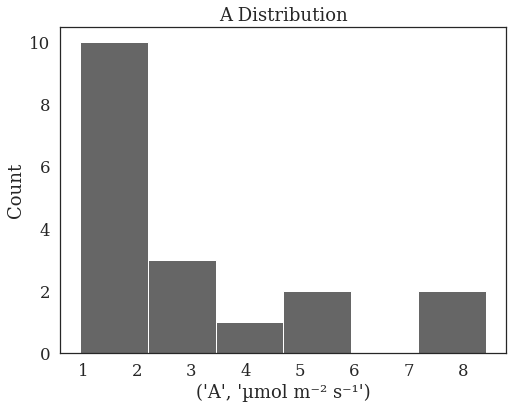

In [57]:
plot_parameter_distribution(df,'A')

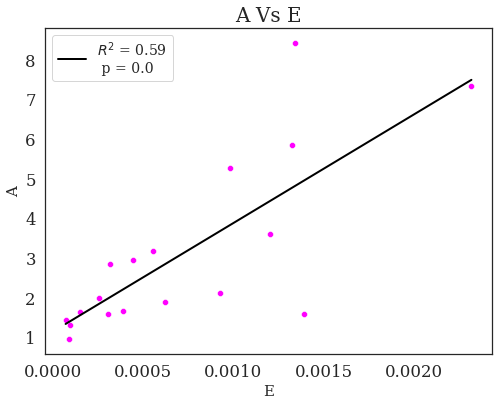

In [73]:
plot_2parameters(df,'E','A')